In [1]:
# This script make few dimenitional bifurcation model

# (1) saddle-node bifurcation model : f(x) =  x - 1/3 x^3  - p
#  bifaction point p_c =  2/ 3

In [2]:
import numpy as np 
import scipy as a
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#  ODE function
def f_SNB(x,p):
    return x - 1/3 *(x**3) + p

(-2.0, 2.0)

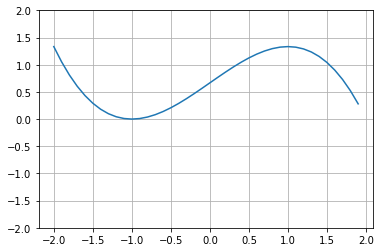

In [4]:
x = np.arange(-2,2,0.1)
plt.plot(x,f_SNB(x,2/3))
plt.grid()
plt.ylim([-2,2])

In [5]:
np.random.seed(0)
N = 1000
Nc = 1000
T = 10
dt = 0.1
times = np.arange(0,T,dt)

omega =   0.1 * np.random.randn(N,times.shape[0])

p = - 1 + ((5/3) + (20/3)*np.random.rand(N,1)) *  times.reshape(-1)/T 

x0 =   - np.ones(N) 
#  search  initial  equilibrium point 
for  t in range(100):
    x0 = x0  + dt * (f_SNB(x0,p[:,0]))
    
x = np.zeros((N,times.shape[0]))
x[:,0] = x0

for  t in range(times.shape[0] - 1):
    x[:,t+1] = x[:,t]  + dt * (f_SNB(x[:,t],p[:,t]))  + np.sqrt(dt)*omega[:,t]

y = np.ones(x.shape[:2])
y[p>2/3]  = 0


# make control    
omega_c =   0.1 * np.random.randn(N,times.shape[0])

pc = - 1 + ((5/3)*np.random.rand(N,1)) *  times.reshape(-1)/T 

x0 =   - np.ones(N) 
#  search  initial  equilibrium point 
for  t in range(100):
    x0 = x0  + dt * (f_SNB(x0,pc[:,0]))
    
xc = np.zeros((Nc,times.shape[0]))
xc[:,0] = x0

for  t in range(times.shape[0] - 1):
    xc[:,t+1] = xc[:,t]  + dt * (f_SNB(xc[:,t],pc[:,t]))  + np.sqrt(dt)*omega_c[:,t]

yc = -np.ones(xc.shape[:2])


x = np.r_[x,xc]
y = np.r_[y,yc]

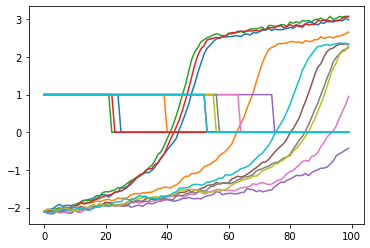

In [6]:
plt.plot(x[:10,:].T)
plt.plot(y[:10,:].T)
plt.show()

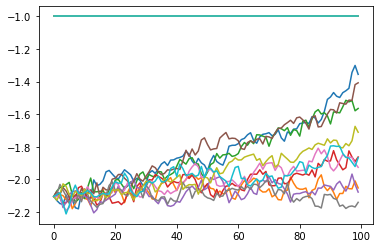

In [7]:
plt.plot(xc[:10,:].T)
plt.plot(yc[:10,:].T)
plt.show()

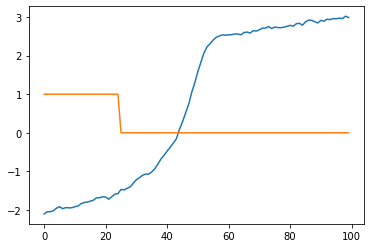

In [8]:
plt.plot(x[0,:].T)
plt.plot(y[0,:].T)
plt.show()

In [9]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1)]
df = pd.DataFrame(data,columns = ['id','time','label','state'])
df.to_csv('../data/saddle_node_bifurcation_lnt.csv')

In [10]:
import networkx as nx

In [11]:
nodes = [0,1,2,3,4]
edges = [(0,1),(2,3),(3,4),(4,2)]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

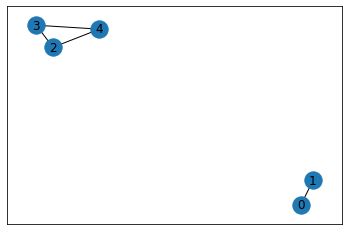

In [12]:
M = nx.linalg.laplacianmatrix.laplacian_matrix(G)
nx.draw_networkx(G)

In [13]:
N = 1000
Nc = 1000
T = 10
dt = 0.1
n = M.shape[0]
alpha = 0.25
times = np.arange(0,T,dt)


# test data
p =  np.zeros((N,times.shape[0],n))
p[:,:,0] = - 1 + ((5/3) + (20/3)*np.random.rand(N,1)) *  times.reshape(-1)/T 


x = np.zeros((N,times.shape[0],n))


for iN in range(N):
    x0 =   - 2 * np.ones(n) 
    omega =   0.1 * np.random.randn(times.shape[0],n)

    #  search  initial  equilibrium point 
    for  t in range(100):
        x0 = x0  + dt * (f_SNB(x0,p[iN,0,:]) +  alpha *  (M @ x0))
    x[iN,0] = x0

    for  t in range(times.shape[0]-1):
        x[iN,t+1] = x[iN,t]  + dt * (f_SNB(x[iN,t],p[iN,t]) +  alpha *  (M @ x[iN,t])) + np.sqrt(dt) * omega[t]

y = np.ones(x.shape[0:2])
y[p[:,:,0]>2/3]  = 0


# control data
pc =  np.zeros((N,times.shape[0],n))
pc[:,:,0] = - 1 + ((5/3)*np.random.rand(N,1)) *  times.reshape(-1)/T 


xc = np.zeros((Nc,times.shape[0],n))


for iN in range(Nc):
    x0 =   - 2 * np.ones(n) 
    omega_c =   0.1 * np.random.randn(times.shape[0],n)

    #  search  initial  equilibrium point 
    for  t in range(100):
        x0 = x0  + dt * (f_SNB(x0,p[iN,0,:]) +  alpha *  (M @ x0))
    xc[iN,0] = x0

    for  t in range(times.shape[0]-1):
        xc[iN,t+1] = xc[iN,t]  + dt * (f_SNB(xc[iN,t],pc[iN,t]) +  alpha *  (M @ xc[iN,t])) + np.sqrt(dt) * omega_c[t]

yc =  -np.ones(x.shape[0:2])

x = np.r_[x,xc]
y = np.r_[y,yc]

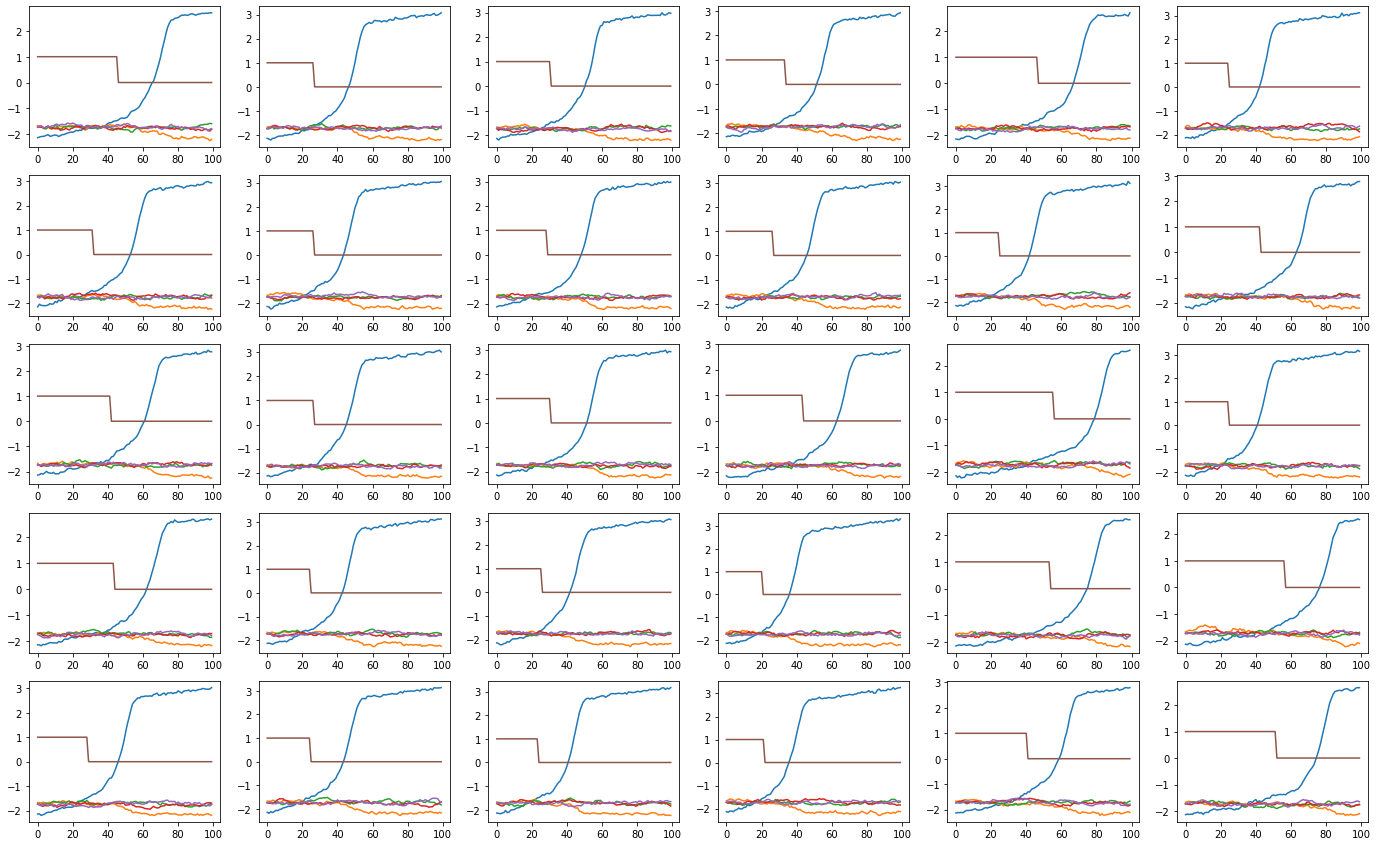

In [14]:
Nx = 5
Ny = 6
plt.figure(figsize=(4*Ny,3*Nx))
for i in range(Nx):
    for j in range(Ny):
        plt.subplot(Nx,Ny,j+Ny*i+1)
        plt.plot(x[j+Ny*i,:])
        plt.plot(y[j+Ny*i,:])

        


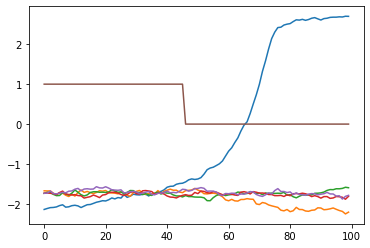

In [15]:
plt.plot(x[0,:])
plt.plot(y[0,:])



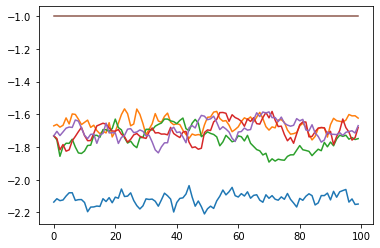

In [16]:
plt.plot(xc[0,:])
plt.plot(yc[0,:])

In [17]:
indecs =  np.arange(N+Nc).reshape(N+Nc,1) * np.ones((1,times.shape[0]))
times_data = np.ones(N+Nc).reshape(N+Nc,1) * times.reshape(1,-1)
data = np.c_[indecs.reshape(-1),times_data.reshape(-1),y.reshape(-1),x.reshape(-1,n)]
df = pd.DataFrame(data,columns = ['id','time','label'] + ['state' + str(i) for i in range(n)])
df.to_csv('../data/mult_saddle_node_bifurcation_lnt.csv')